In [1]:
### importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
#reading the dataset
# kaggle : https://www.kaggle.com/arjunbhasin2013/ccdata
data = pd.read_csv(r'CC GENERAL.csv')

In [3]:
#checking the data type and count of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<b>from above we can see that there are null values in credit limit and minimum payment columns</b>

### Data Cleaning

In [4]:
## lets check the cout of null values

data.isna().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

<b>
NA Values <br>
________<br>
CREDIT_LIMIT has 1 NA value<br>
MINIMUM_PAYMENTS has 313 NA values</b>

In [5]:
## dropping rows which has NA values in CREDIT LIMIT COLUMN

data = data[data['CREDIT_LIMIT'].notna()]

In [6]:
data.isna().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
PAYMENTS              0
dtype: int64

In [7]:
### minmum payments has 313 null values

data['MINIMUM_PAYMENTS'].describe()

count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [8]:
data[data['MINIMUM_PAYMENTS'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [9]:
(data['PAYMENTS']==0).value_counts()

False    8709
True      240
Name: PAYMENTS, dtype: int64

<b>out of 313 na values in MINIMUM_PAYMENT columns 240 NA are there because total payment made by account holder is 0
hence MINIMUM_PAYMENT should also be 0</b>

In [10]:
data[data['PAYMENTS']==0].isna().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    240
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
PAYMENTS              0
dtype: int64

In [11]:
## filling na value with 0 where total payment is 0

data[data['PAYMENTS']==0] = data[data['PAYMENTS']==0].fillna(value=0)

In [12]:
data.isna().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    73
CUST_ID              0
BALANCE              0
PRC_FULL_PAYMENT     0
PAYMENTS             0
dtype: int64

<b>still there are 73 null values in the minimum paymnent columns</b>

<b>As there is no relations ship of 73 na values with other features hence filing those na values with median as data is higly skewd we cant use mean</b>

In [13]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace = True)

In [14]:
data.isna().sum().sort_values(ascending=False).head()

CUST_ID             0
BALANCE             0
PRC_FULL_PAYMENT    0
MINIMUM_PAYMENTS    0
PAYMENTS            0
dtype: int64

<b>No null values in the dataset now</b>

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHA

In [16]:
df = data.copy()

In [17]:
### customer ID is unique for each customer hence dropping the customer id columns
### as it doesn't provide anyadditional information

df.drop(['CUST_ID'], axis=1, inplace=True)

In [18]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Data Visualization

In [19]:
col_lst = df.columns.tolist()

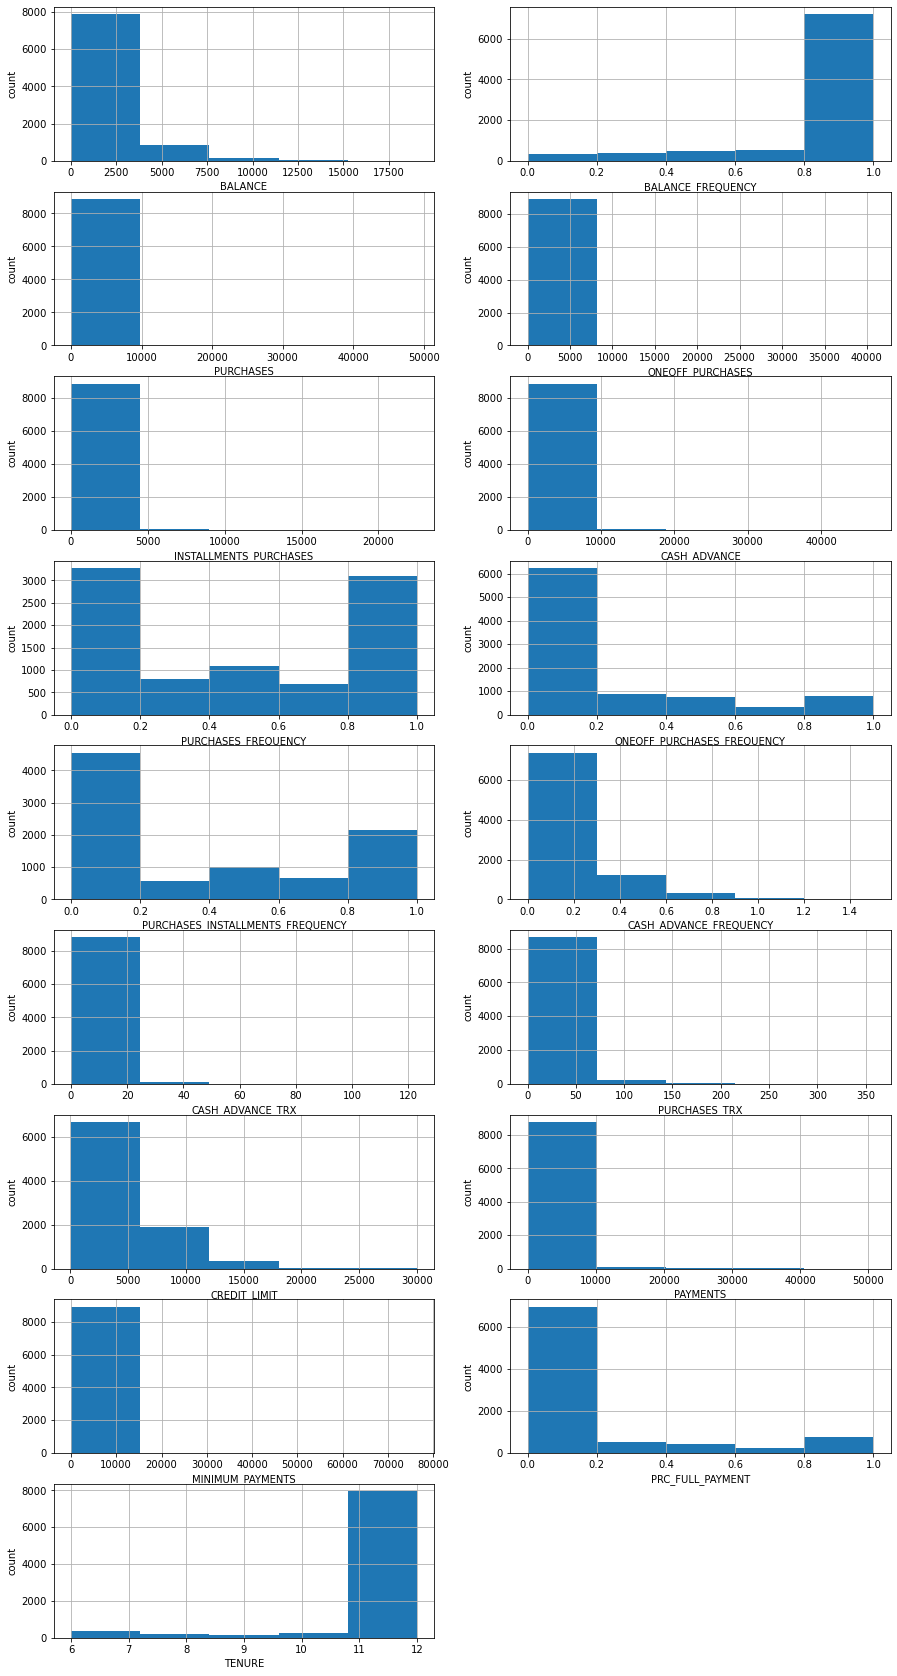

In [20]:
fig = plt.figure(figsize=(15,30))
plt_no = 0
for i in col_lst:  
    ax = plt.subplot(9,2,plt_no+1)
    plt_no += 1
    plt.hist(df[i],5)
    plt.grid(True)
    plt.xlabel(i)
    plt.ylabel('count')
plt.show()


<b>There is lots of skewness and it's varied and this is common in this type of data as consumer behaviour vary greatly from person to person </b>

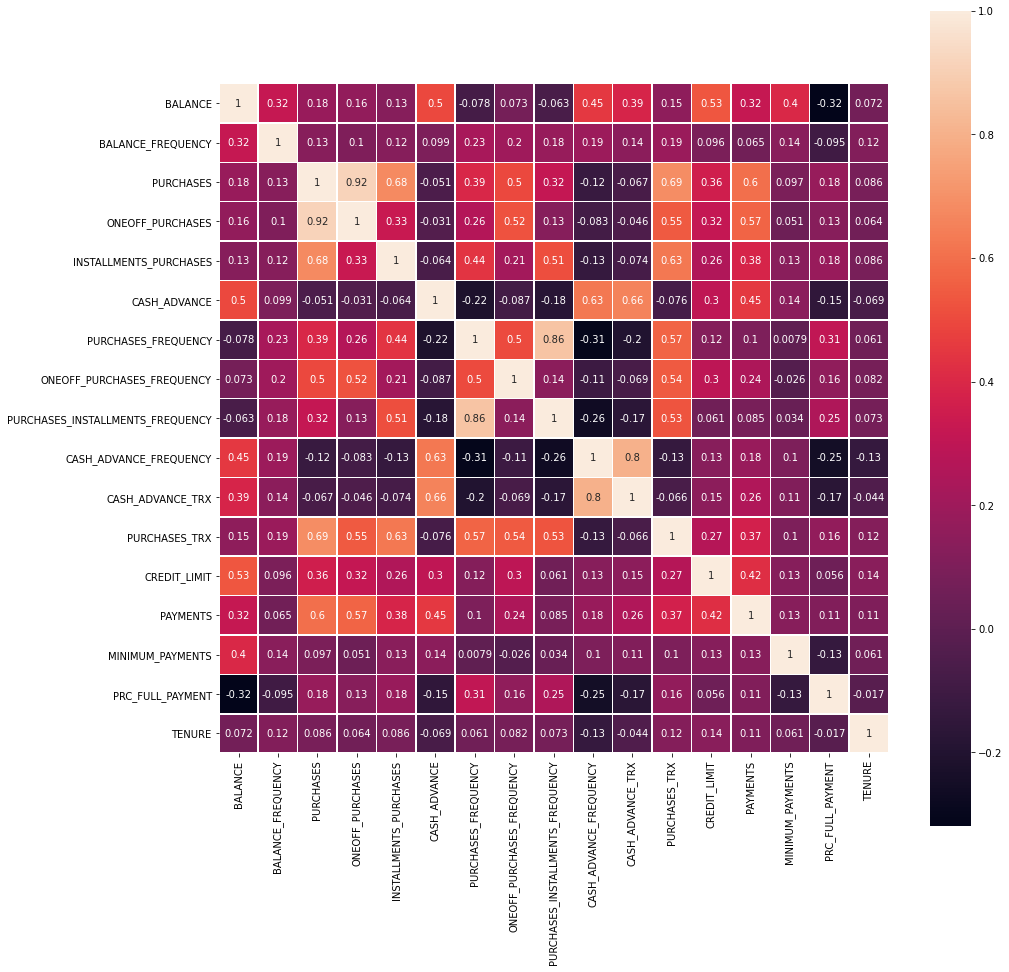

In [21]:
fig = plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True,square=True,linewidths=.5)
plt.show()

<b>There is high correlation between some of the features</b>

<b>Clustering doesn't rely on linear assumptions, and so collinearity wouldn't cause issues.<br>
but we can leverage the correlated variables via PCA/dimensionality reduction to reduce computation overhead.</b>

<function matplotlib.pyplot.show(close=None, block=None)>

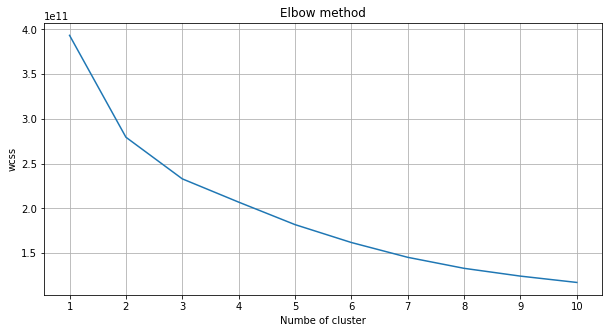

In [22]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i , random_state=20)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

fig = plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Numbe of cluster')
plt.ylabel('wcss')
plt.xticks(range(1,11))
plt.grid(True)
plt.show

<b>
There seems to be elbow around 2 to 4<br>
We will use silhouette score to see which one performs better. <br>

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. <br>

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.
<b>

In [23]:
kmeans = KMeans(n_clusters= 2 , random_state=20)
kmeans.fit(df)

KMeans(n_clusters=2, random_state=20)

<function matplotlib.pyplot.show(close=None, block=None)>

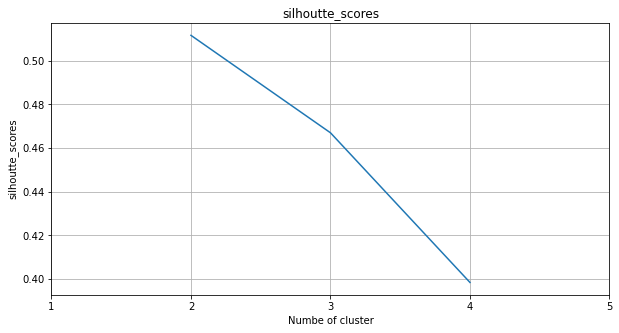

In [24]:
silhoutte_scores= []
for i in range(2,5):
    kmeans = KMeans(n_clusters= i , random_state=20)
    kmeans.fit(df)
    silhoutte_scores.append(silhouette_score(df, kmeans.predict(df)))


fig = plt.figure(figsize=(10,5))
plt.plot(range(2,5), silhoutte_scores)
plt.title('silhoutte_scores')
plt.xlabel('Numbe of cluster')
plt.ylabel('silhoutte_scores')
plt.xticks(range(1,6))
plt.grid(True)
plt.show

<b>We will select the number of clusters as 3 as after 3 cluster silhoutte score is decreasing rapidl </b>

In [25]:
kmeans = KMeans(n_clusters= 3 , random_state=20)
model = kmeans.fit(df)

In [26]:
labels = model.predict(df)

In [27]:
df['clusters'] = labels

In [28]:
df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0


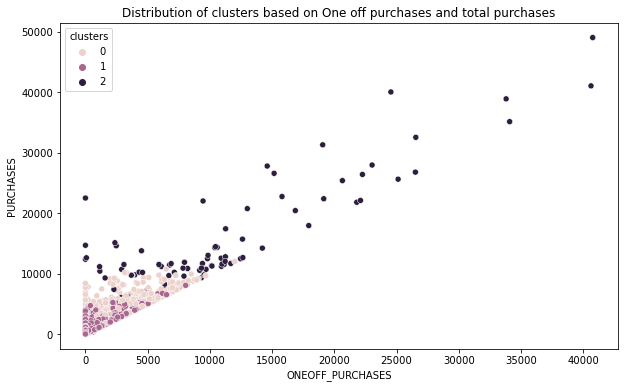

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='clusters')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

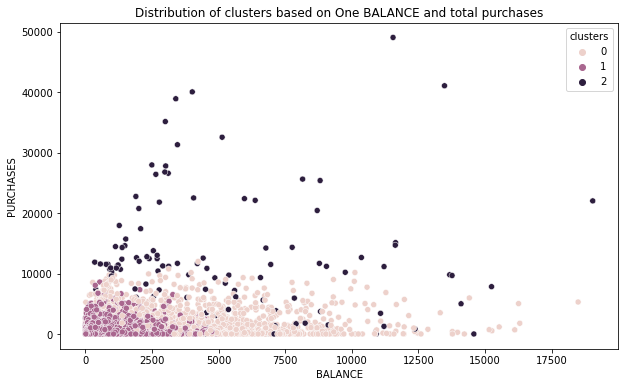

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES', hue='clusters')
plt.title('Distribution of clusters based on One BALANCE and total purchases')
plt.show()

#### plot with centroids 

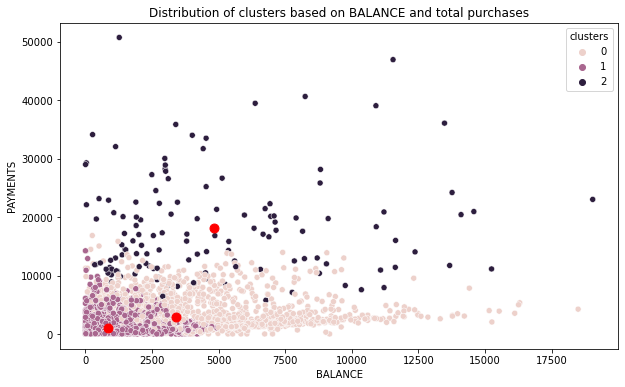

In [31]:
plt.figure(figsize=(10,6))
centroids = kmeans.cluster_centers_
sns.scatterplot(data=df, x='BALANCE', y='PAYMENTS', hue='clusters')
plt.scatter(centroids[:,0] , centroids[:,13] , s = 80, color = 'r')
plt.title('Distribution of clusters based on BALANCE and total purchases')
plt.show()

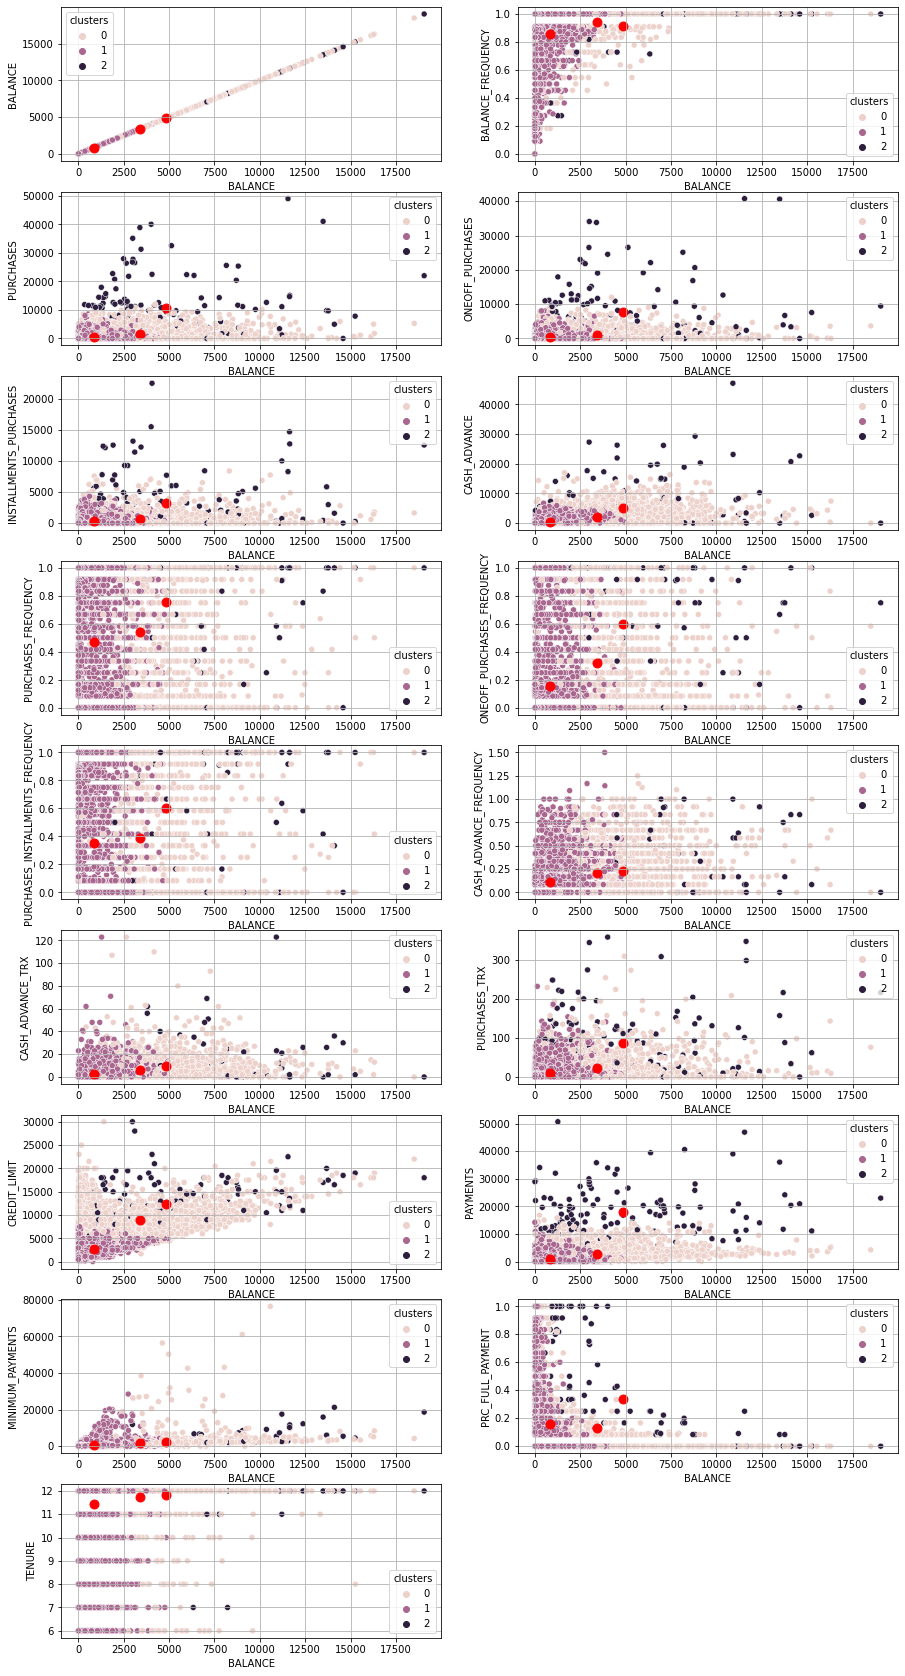

In [32]:
fig = plt.figure(figsize=(15,30))
plt_no = 0
centroid_index = 0
for i in col_lst:  
    ax = plt.subplot(9,2,plt_no+1)
    plt_no += 1
    sns.scatterplot(data=df, x='BALANCE', y=i, hue='clusters')
    plt.scatter(centroids[:,0] , centroids[:,centroid_index] , s = 80, color = 'r')
    centroid_index +=1
    plt.grid(True)
    plt.xlabel('BALANCE')
    plt.ylabel(i)
plt.show()